### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Visualization

### Multivariate Analysis (pairplot)
*   Plot pairwise relationships in our dataset.
*   Diagonal has probability Density Functions.




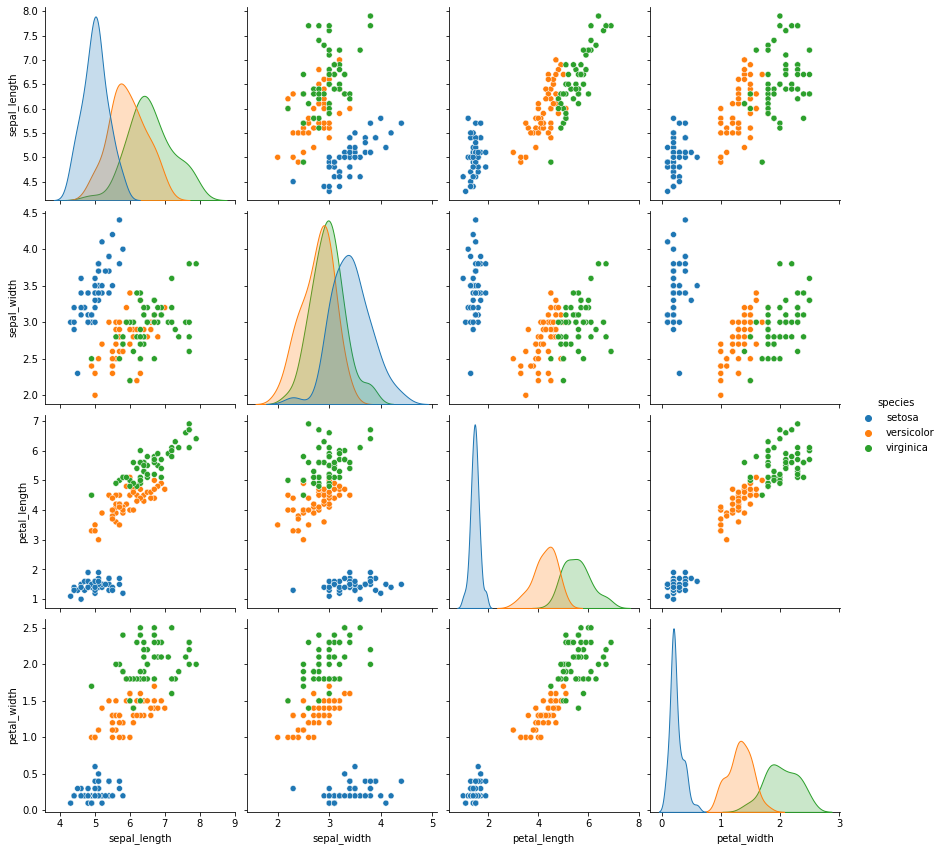

In [9]:
sns.pairplot(df,hue="species",height=3,kind='scatter')

**OBSERVATION** - It is very easy to classify Setosa Flower

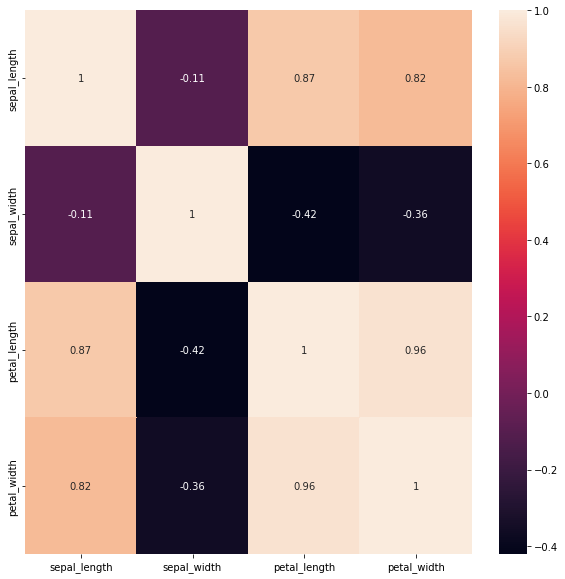

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

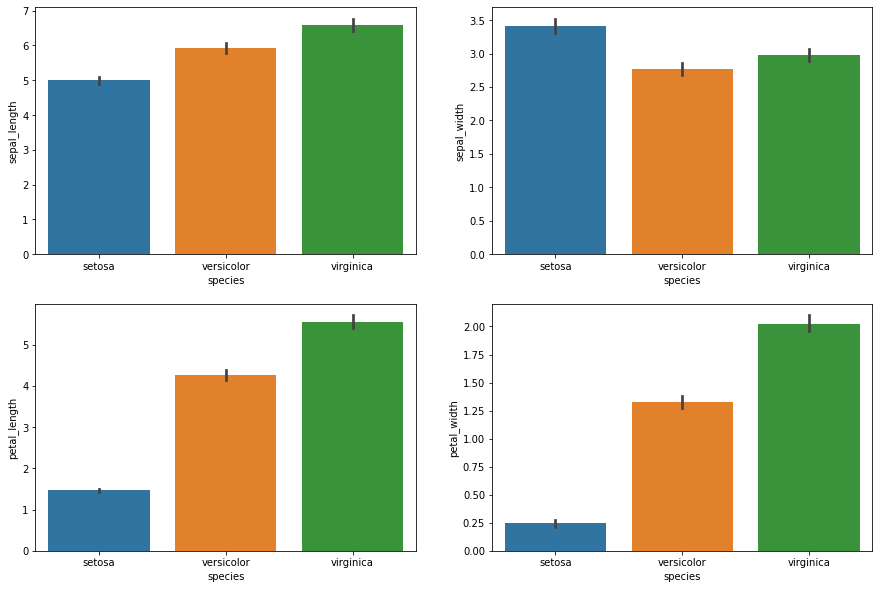

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x= 'species',y = 'sepal_length', data = df)
plt.subplot(2,2,2)
sns.barplot(x= 'species',y = 'sepal_width', data = df)
plt.subplot(2,2,3)
sns.barplot(x= 'species',y = 'petal_length', data = df)
plt.subplot(2,2,4)
sns.barplot(x= 'species',y = 'petal_width', data = df)

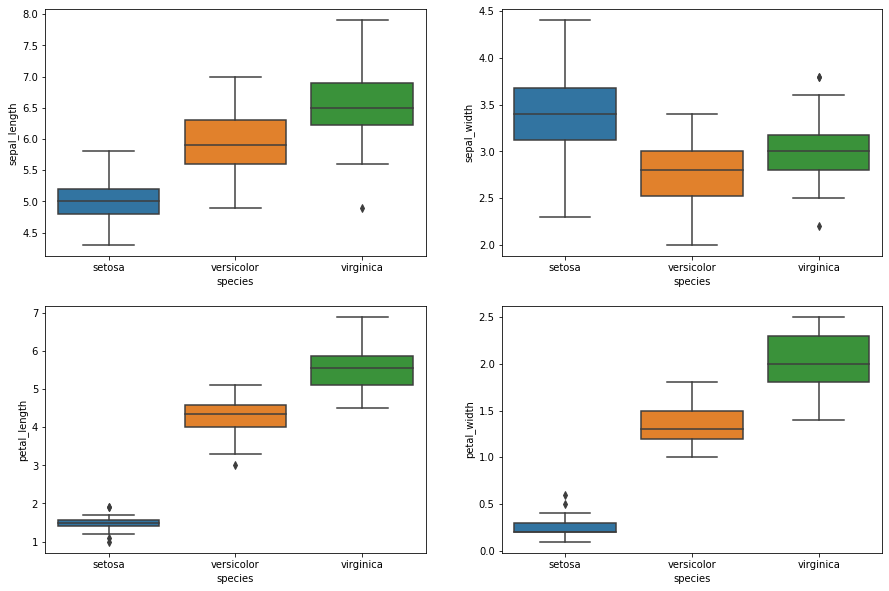

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'species',y = 'sepal_length', data = df)
plt.subplot(2,2,2)
sns.boxplot(x= 'species',y = 'sepal_width', data = df)
plt.subplot(2,2,3)
sns.boxplot(x= 'species',y = 'petal_length', data = df)
plt.subplot(2,2,4)
sns.boxplot(x= 'species',y = 'petal_width', data = df)

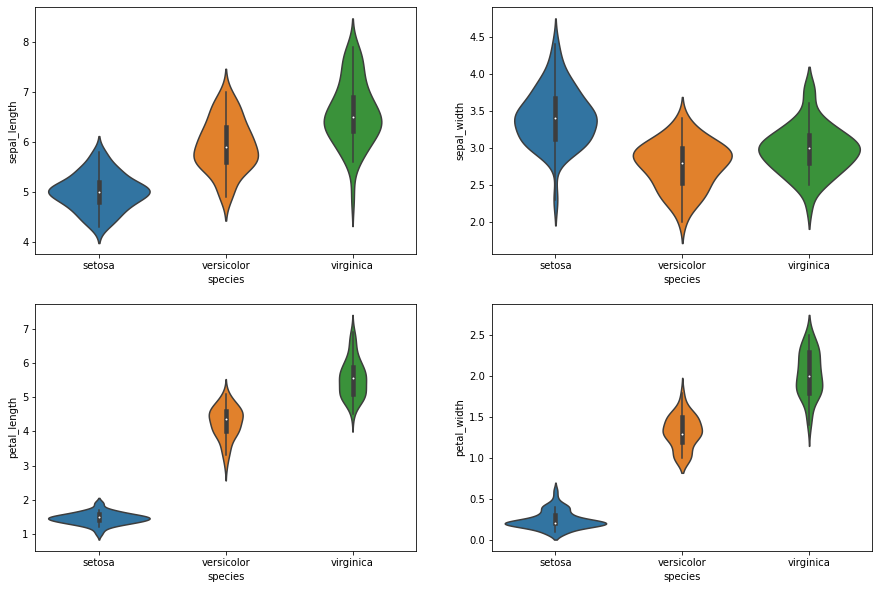

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x= 'species',y = 'sepal_length', data = df)
plt.subplot(2,2,2)
sns.violinplot(x= 'species',y = 'sepal_width', data = df)
plt.subplot(2,2,3)
sns.violinplot(x= 'species',y = 'petal_length', data = df)
plt.subplot(2,2,4)
sns.violinplot(x= 'species',y = 'petal_width', data = df)

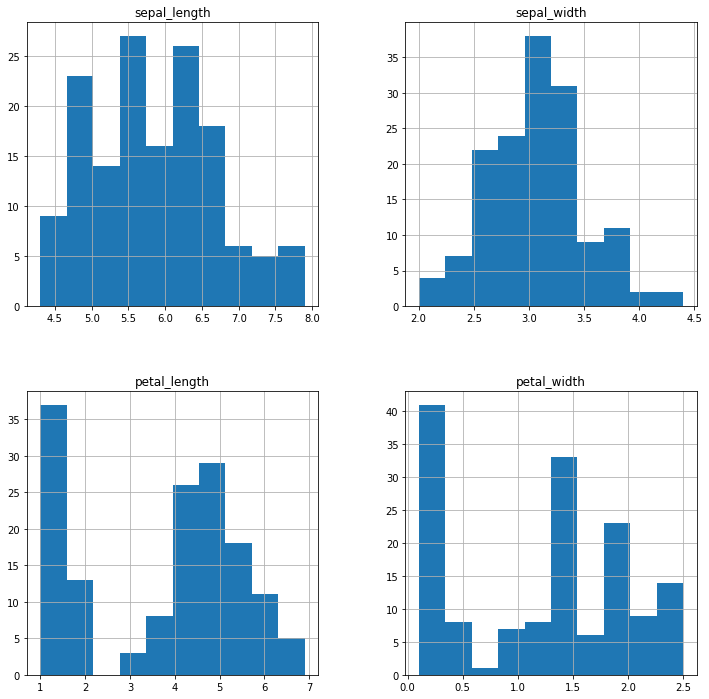

In [15]:
df.hist(figsize=(12,12))
plt.show()

## Handling Categorical Variable

*   We have `Nominal` categories as our target
*   We will be using `Label Encoding`.



In [16]:
a={'virginica':0, 'versicolor':1 ,'setosa':2}
df['species']=df['species'].apply(lambda x:a[x])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


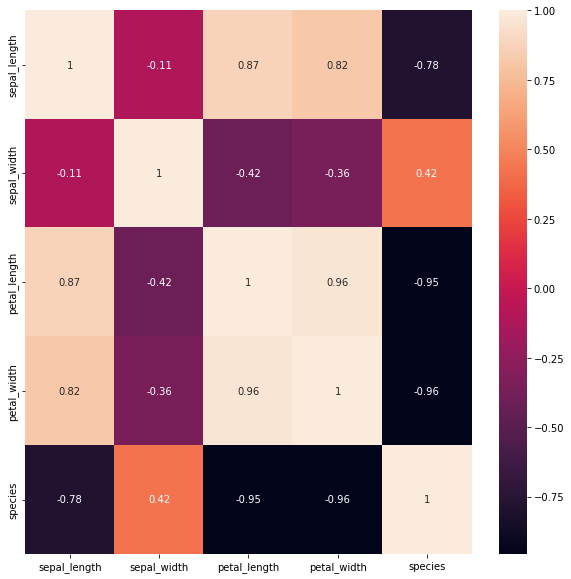

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('species',axis=1), 
                                                    df['species'], test_size=0.25, 
                                                    random_state=5)

In [20]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize and Train  KNN Classifier
knn= KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, Y_train)

pred = knn.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [26]:
print(f"The accuracy is {(accuracy_score(Y_test,pred))*100} %")

The accuracy is 100.0 %
